<a href="https://colab.research.google.com/github/arsfish/EDA-of-10k-Apple-Music-Tracks/blob/main/EDA_of_10k_Apple_Music_Tracks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="5">Apple Music dataset exploratory study, data credit to <a href="https://www.kaggle.com/datasets/kanchana1990/apple-music-dataset-10000-tracks-uncovered">Kanchana1990 (kaggle)</a></font>

<font size="4">This Notebook has been released under the Apache 2.0 open source license.</font> \\
Author: https://www.kaggle.com/arsfish \\
Contact: arina.parfishina@gmail.com \\
tg: https://t.me/arsfish

## Welcome to the short journey through Apple Music song dataset!

The aim of the EDA study is a comprehensive analysis of the music industry in the USA based on a dataset of 10 000 songs.

The project consists of a few blocks:

* Quick first glance at the data
* Genres' and years' distribution
* Artists' and albums' study
* Tracks' and albums' prices study: correlation analysis
* Analysis of track explicitness

# Data Preprocessing
* Examine the shape of data
* Found and excluded null values
* Taken into account incorrect values (i.e. $-1 cost for some albums)

# <font size="5">Load libraries and data-file</font>

In [ ]:
#Python 3
#Import necessary libs
import numpy as np
import pandas as pd #data processing
import matplotlib.pyplot as plt #graphs
import scipy.stats as stats #for correlation study
import matplotlib.ticker as ticker #for formatting histograms

In [ ]:
df = pd.read_csv('/content/apple_music_dataset.csv')

# <font size="5">Quick first glance at the data</font>

In [ ]:
#Checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   artistId                10000 non-null  int64  
 1   artistName              10000 non-null  object 
 2   collectionCensoredName  10000 non-null  object 
 3   collectionId            10000 non-null  int64  
 4   collectionName          10000 non-null  object 
 5   collectionPrice         9919 non-null   float64
 6   contentAdvisoryRating   1512 non-null   object 
 7   country                 10000 non-null  object 
 8   currency                10000 non-null  object 
 9   discCount               10000 non-null  int64  
 10  discNumber              10000 non-null  int64  
 11  isStreamable            9999 non-null   object 
 12  kind                    10000 non-null  object 
 13  previewUrl              10000 non-null  object 
 14  primaryGenreName        10000 non-null 

In [ ]:
#First look at data
df.head()

,artistId,artistName,collectionCensoredName,collectionId,collectionName,collectionPrice,contentAdvisoryRating,country,currency,discCount,...,primaryGenreName,releaseDate,trackCensoredName,trackCount,trackExplicitness,trackId,trackName,trackNumber,trackPrice,trackTimeMillis
0,46087,Erick Sermon,Music,298321651,Music,9.99,Explicit,USA,USD,1,...,Hip-Hop/Rap,2001-08-27T12:00:00Z,Music (feat. Marvin Gaye),16,explicit,298321904,Music,4,1.29,223133
1,20044,Madonna,Music,80815197,Music,9.99,NaN,USA,USD,1,...,Pop,2000-08-21T07:00:00Z,Music,10,notExplicit,80815173,Music,1,1.29,225973
2,486597,Journey,Greatest Hits (2024 Remaster),169003304,Greatest Hits (2024 Remaster),10.99,NaN,USA,USD,1,...,Rock,1981-06-03T07:00:00Z,Don't Stop Believin' (2024 Remaster),16,notExplicit,169003415,Don't Stop Believin' (2024 Remaster),2,1.29,250835
3,156987,Jason Mraz,We Sing. We Dance. We Steal Things,277635758,We Sing. We Dance. We Steal Things,11.99,NaN,USA,USD,1,...,Pop,2008-02-12T08:00:00Z,I'm Yours,12,notExplicit,277635828,I'm Yours,2,1.29,242947
4,46087,Erick Sermon,Music,298429528,Music,9.99,Clean,USA,USD,1,...,Hip-Hop/Rap,2001-05-29T07:00:00Z,Music (feat. Marvin Gaye),16,cleaned,298429596,Music,4,1.29,223133


In [ ]:
#Showing all column names
print(df.columns)

Index(['artistId', 'artistName', 'collectionCensoredName', 'collectionId',
       'collectionName', 'collectionPrice', 'contentAdvisoryRating', 'country',
       'currency', 'discCount', 'discNumber', 'isStreamable', 'kind',
       'previewUrl', 'primaryGenreName', 'releaseDate', 'trackCensoredName',
       'trackCount', 'trackExplicitness', 'trackId', 'trackName',
       'trackNumber', 'trackPrice', 'trackTimeMillis'],
      dtype='object')


In [ ]:
#Counting number of artists and their occurance frequency using 'artistId'
artist_counts = df['artistId'].value_counts()
print(artist_counts)

159260351     150
396754057     130
315816847     124
32940         109
205322         95
             ... 
1220215284      1
386478007       1
1077006788      1
1304377463      1
91157642        1
Name: artistId, Length: 1694, dtype: int64


In [ ]:
#Counting number of different genres and their occurance frequency using 'primaryGenreName'
genre_counts = df['primaryGenreName'].value_counts()
print(genre_counts)

Pop                    2221
Country                1368
Rock                   1333
Alternative            1111
Hip-Hop/Rap            1021
Soundtrack              688
Hard Rock               548
R&B/Soul                449
Christian               174
Singer/Songwriter       157
Dance                   157
Metal                   111
Christmas: Pop           80
Musicals                 76
Holiday                  75
Classical                67
Electronic               66
Children's Music         45
Rap                      29
Música tropical          24
Hip-Hop                  17
Pop Latino               17
Soft Rock                16
Fitness & Workout        14
Comedy                   13
Reggae                   13
Latin                    12
Easy Listening           11
Christmas: Classic        9
Jazz                      7
Punk                      7
Christmas: Country        6
Urbano latino             6
Folk                      5
Worldwide                 5
New Wave            

In [ ]:
#determining how many country occurs and which
country_counts = df['country'].value_counts()
print(country_counts)

USA    10000
Name: country, dtype: int64


# <font size="5">Genres' and Years' study</font>

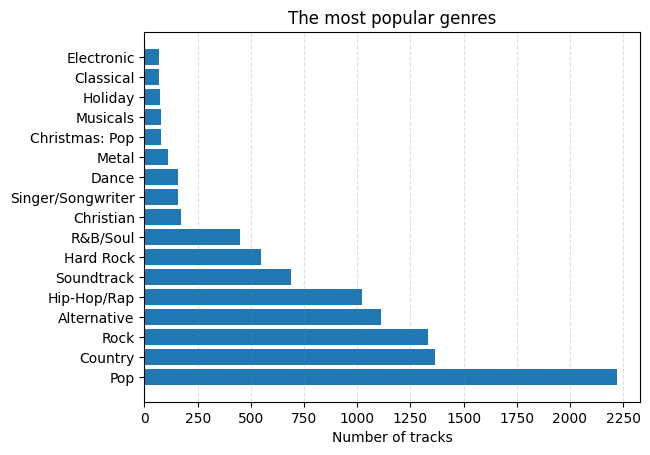

In [ ]:
fig, ax = plt.subplots()
selected_genreCounts = genre_counts[genre_counts.values > 50] #including genres only with 50+ tracks
ax.barh(selected_genreCounts.index, selected_genreCounts.values)
plt.xlabel('Number of tracks')
plt.title('The most popular genres')
ax.set_xticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250])
ax.xaxis.grid(True, linestyle='--', which='major',  color='grey', alpha=.25)
plt.show()

<font size="4">TOP-5 genres with the most number of tracks: Pop, Country, Rock, Alternative and Hip-Hop/Rap.
All TOP-5 genres are including 1000+ tracks.</font>

In [ ]:
#Converting date to 'Y-m-d TH:M:SZ'-format and taking only years 'YYYY', creating separate data frame
date_df = pd.DataFrame({'collectionName' : df['collectionName'], 'collectionId' : df['collectionId'], 'primaryGenreName' : df['primaryGenreName'],'trackPrice' : df['trackPrice'] ,'collectionPrice' : df['collectionPrice'],
                        'releaseYear' : pd.to_datetime(df['releaseDate'], format='%Y-%m-%dT%H:%M:%SZ').dt.year})

#Creating column with decades
date_df['decade'] = (date_df['releaseYear'] // 10) * 10

  <font size="5">Popularity pop, country, rock, alternative & hip-hop/rap  in years</font>

<font size="4">Counting nubmer of songs per years for each of TOP-5 genres:</font>

In [ ]:
#Counting pop music songs
popYears = date_df[date_df['primaryGenreName'] == 'Pop']
count_popYears = popYears.groupby('releaseYear')['primaryGenreName'].count()

#Counting country music songs
countryYears = date_df[date_df['primaryGenreName'] == 'Country']
count_countryYears = countryYears.groupby('releaseYear')['primaryGenreName'].count()

#Counting rock music songs
rockYears = date_df[date_df['primaryGenreName'] == 'Rock']
count_rockYears = rockYears.groupby('releaseYear')['primaryGenreName'].count()

#Counting alternative music songs
alternativeYears = date_df[date_df['primaryGenreName'] == 'Alternative']
count_alternativeYears = alternativeYears.groupby('releaseYear')['primaryGenreName'].count()

#Counting hip-hop/rap music songs
hiphopYears = date_df[date_df['primaryGenreName'] == 'Hip-Hop/Rap']
count_hiphopYears = hiphopYears.groupby('releaseYear')['primaryGenreName'].count()

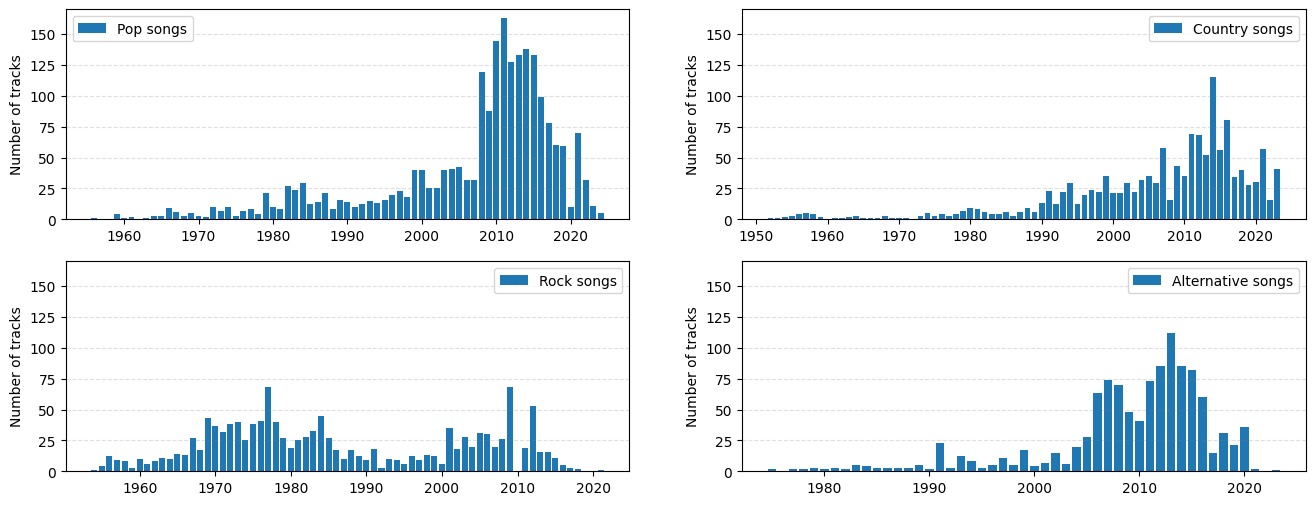

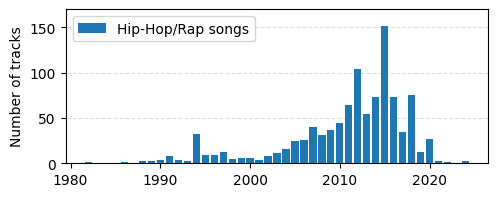

In [ ]:
#Showing diagram
fig, axs = plt.subplots(2, 2, figsize=(16, 6))
axs[0, 0].bar(count_popYears.index[count_popYears.index > 1950], count_popYears.values[count_popYears.index > 1950], label='Pop songs')
axs[0,0].set_ylim(0, 170)
axs[0,0].set_ylabel('Number of tracks')
axs[0,0].grid(axis='y', visible=True, linestyle='--', which='major', color='grey', alpha=.25)
axs[0, 0].legend()

axs[0, 1].bar(count_countryYears.index[count_countryYears.index > 1950], count_countryYears.values[count_countryYears.index > 1950], label='Country songs')
axs[0,1].set_ylim(0, 170)
axs[0,1].set_ylabel('Number of tracks')
axs[0,1].grid(axis='y', visible=True, linestyle='--', which='major', color='grey', alpha=.25)
axs[0,1].legend()

axs[1, 0].bar(count_rockYears.index[count_rockYears.index > 1950], count_rockYears.values[count_rockYears.index > 1950], label='Rock songs')
axs[1,0].set_ylim(0, 170)
axs[1,0].set_ylabel('Number of tracks')
axs[1,0].grid(axis='y', visible=True, linestyle='--', which='major', color='grey', alpha=.25)
axs[1,0].legend()

axs[1, 1].bar(count_alternativeYears.index[count_alternativeYears.index > 1950], count_alternativeYears.values[count_alternativeYears.index > 1950], label='Alternative songs')
axs[1,1].set_ylim(0, 170)
axs[1,1].set_ylabel('Number of tracks')
axs[1,1].grid(axis='y', visible=True, linestyle='--', which='major', color='grey', alpha=.25)
axs[1,1].legend()

plt.figure(figsize=(12, 2))
plt.subplot(1, 2, 1)
plt.ylim(0, 170)
plt.bar(count_hiphopYears.index[count_hiphopYears.index > 1950], count_hiphopYears.values[count_hiphopYears.index > 1950], label='Hip-Hop/Rap songs')
plt.ylabel('Number of tracks')
plt.grid(axis='y', visible=True, linestyle='--', which='major', color='grey', alpha=.25)
plt.legend()

* Number of pop songs have fast growth since ~2008 year;
* Country songs number has grown in a middle of 2010th;
* The peak number of rock songs was in 1970-80th.
* The largest number of tracks in the alternative genre were released from the mid-2000s to the mid-2010s
* There were almost zero tracks in Hip-Hop/Rap genre up to 1990th.

<font size="4"> Evolution of top-5 genres by number of songs over decades</font>

In [ ]:
#Counting number of songs for each of top-5 genres over decades
count_popDecades = popYears.groupby('decade')['primaryGenreName'].count()
count_rockDecades = rockYears.groupby('decade')['primaryGenreName'].count()
count_countryDecades = countryYears.groupby('decade')['primaryGenreName'].count()
count_alternativeDecades = alternativeYears.groupby('decade')['primaryGenreName'].count()
count_hiphopDecades = hiphopYears.groupby('decade')['primaryGenreName'].count()

In [ ]:

x = np.array(count_popDecades.index[count_popDecades.index>1940]) #counting without 1900s
#checking for shape mismatches
for decade in x:
    if count_popDecades.get(decade) is None:
        count_popDecades[decade] = 0
    if count_rockDecades.get(decade) is None:
        count_rockDecades[decade] = 0
    if count_countryDecades.get(decade) is None:
        count_countryDecades[decade] = 0
    if count_hiphopDecades.get(decade) is None:
        count_hiphopDecades[decade] = 0
    if count_alternativeDecades.get(decade) is None:
        count_alternativeDecades[decade] = 0
#sorting by ascending
count_alternativeDecades = count_alternativeDecades.sort_index()
count_hiphopDecades = count_hiphopDecades.sort_index()

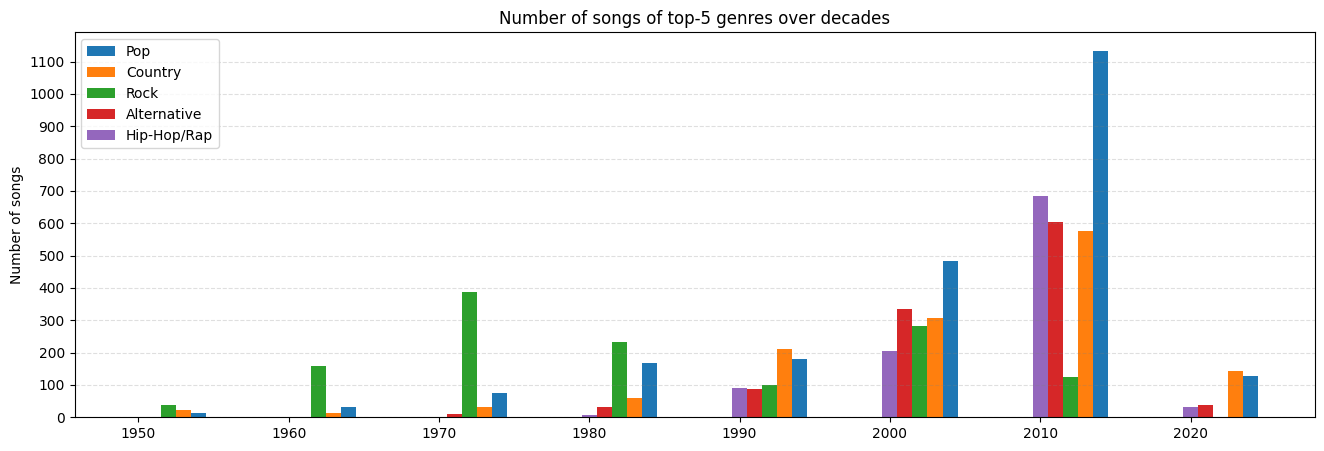

In [ ]:
#Showing diagram with 5
fig, ax1 = plt.subplots(figsize=(16,5))

width = 1 # the width of the bars
multiplier = 0

rects1 = ax1.bar(x + width*4, count_popDecades.values[count_popDecades.index > 1940], width, label='Pop')
rects2 = ax1.bar(x + width*3, count_countryDecades.values[count_countryDecades.index > 1940], width, label='Country')
rects3 = ax1.bar(x + width*2, count_rockDecades.values[count_rockDecades.index > 1940], width, label='Rock')
rects4 = ax1.bar(x + width, count_alternativeDecades.values[count_alternativeDecades.index > 1940], width, label='Alternative')
rects5 = ax1.bar(x, count_hiphopDecades.values[count_hiphopDecades.index > 1940], width, label='Hip-Hop/Rap')

plt.title('Number of songs of top-5 genres over decades')
ax1.set_ylabel('Number of songs')
ax1.set_xticks(x)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100))
plt.grid(axis='y', visible=True, linestyle='--', which='major', color='grey', alpha=.25)
ax1.legend(loc='upper left', fontsize='medium')

<font size="5">Distribution of number of albums by years</font>

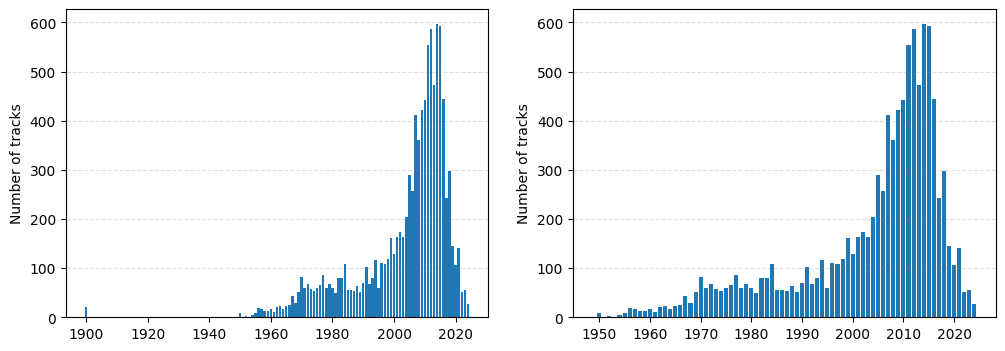

In [ ]:
albumsYears = date_df.groupby('releaseYear')['collectionId'].count()

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.bar(albumsYears.index, albumsYears.values)
plt.ylabel('Number of tracks')
plt.grid(axis='y', visible=True, linestyle='--', which='major', color='grey', alpha=.25)

#filtering tracks only after 1940 because 1900 year tracks correspond to an error in data

filtered_date_df = date_df[date_df['releaseYear'] > 1940]
filteres_albumsYears = filtered_date_df.groupby('releaseYear')['collectionId'].count()

plt.subplot(1,2,2)
plt.bar(filteres_albumsYears.index, filteres_albumsYears.values)
plt.ylabel('Number of tracks')
plt.grid(axis='y', visible=True, linestyle='--', which='major', color='grey', alpha=.25)

# <font size="5">Artists and albums study</font>

<font size="4">Showing TOP-10 artists by numbers of released albums</font>

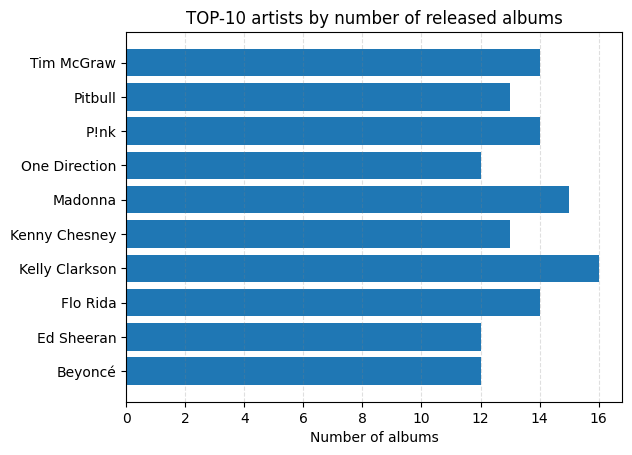

In [ ]:
#Grouping by number of released albums
#counting only unique 'collectionId' for corresponding 'artistId'

uniqueCollection = df.drop_duplicates(['artistId', 'artistName', 'collectionId'])
uniqueCollection_counts = uniqueCollection.groupby('artistId')['collectionId'].nunique()
selected_uniqueCollection = uniqueCollection_counts.sort_values(ascending=False).reset_index()
selected_uniqueCollection = selected_uniqueCollection[selected_uniqueCollection.index < 10]

uniqueCollection_artist = uniqueCollection[uniqueCollection['artistId'].isin(selected_uniqueCollection['artistId'])]
uniqueCollection_artistCounts = uniqueCollection_artist.groupby('artistName')['collectionId'].count()
uniqueCollection_artistCounts = uniqueCollection_artistCounts[uniqueCollection_artistCounts.values>2]
fig, ax3 = plt.subplots()
plt.barh(uniqueCollection_artistCounts.index, uniqueCollection_artistCounts)
plt.xlabel('Number of albums')
plt.title('TOP-10 artists by number of released albums')
ax3.xaxis.grid(True, linestyle='--', which='major',  color='grey', alpha=.25)


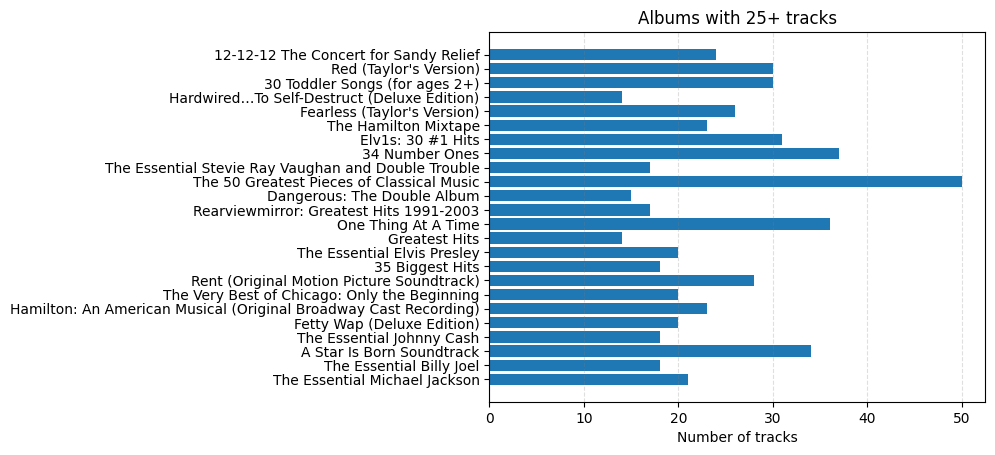

In [ ]:
#Showing albums with 25+ number of tracks
albumCounts = df['collectionId'].value_counts()
fig, ax4 = plt.subplots()
selected_albumCounts = albumCounts[albumCounts.values > 25]
selected_albums = df[df['collectionId'].isin(selected_albumCounts.index)]
ax4.barh(selected_albums['collectionName'], selected_albums['trackCount'])
plt.xlabel('Number of tracks')
plt.title('Albums with 25+ tracks')
ax4.xaxis.grid(True, linestyle='--', which='major',  color='grey', alpha=.25)
plt.show()

* It should be noted that most of the albums on this histogram are collections that include either movie soundtracks or song collection of artists over the years.

# <font size="5">Prices study</font>

* Checking if there're any NaN or incorrect values in price column
* Finding the most expensive and the most cheapest albums
* Showing album cost dependence of number of tracks

In [ ]:
#Checking if there're any NaN values in price column
is_nan =df['collectionPrice'].isnull().any()
print('NaN values:', is_nan)

NaN values: True


In [ ]:
#Counting only positive price value
price_df = price_df =  df.query('collectionPrice > 0')

In [ ]:
#Finding the most  expensive album, number of tracks in it and its artist's name

max_price_row = price_df[price_df['collectionPrice'] == price_df['collectionPrice'].max()]
max_price_row['trackCount'].values[0]

print('Album price = $', max_price_row['collectionPrice'].max())
print('Number of tracks =', max_price_row['trackCount'].values[0])
print('Album name =', max_price_row['collectionName'].values[0])
print('Artist =', max_price_row['artistName'].values[0])

Album price = $ 149.99
Number of tracks = 12
Album name = The Razors Edge
Artist = AC/DC


In [ ]:
#Finding the cheapest album
print('Min price = $', min(df['collectionPrice']))
min_price_row = df[df['collectionPrice'] == df['collectionPrice'].min()]
min_price_row['trackCount'].values[0]

print('Number of tracks =', min_price_row['trackCount'].values[0])
print('Album name =', min_price_row['collectionName'].values[0])
print('Artist =', min_price_row['artistName'].values[0])

Min price = $ -1.0
Number of tracks = 17
Album name = Greatest Hits II
Artist = Kenny Chesney


In [ ]:
#Finding that min price of album is $-1 which means there's data writing mistake. Finding any track price in this album
print('Tracks = ', min_price_row['trackName'].values[0], '\n Price = $', min_price_row['trackPrice'].values[0])

Tracks =  Out Last Night 
 Price = $ 1.29


In [ ]:
#Creating new Data Frame which include only 'collectionPrice' > 0
collectionPrice_df =  df.query('collectionPrice > 0')

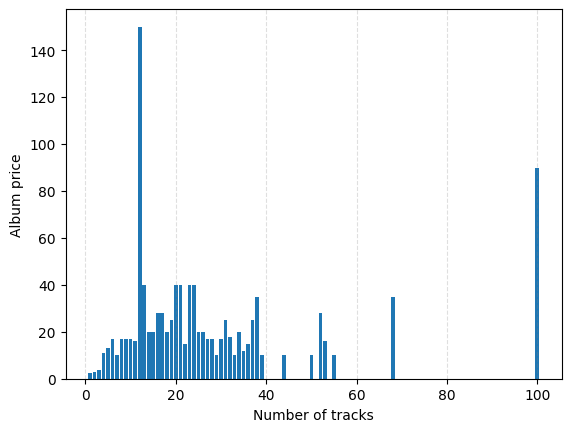

In [ ]:
#album cost dependence of number of tracks
fig, ax5 = plt.subplots()
ax5.bar(collectionPrice_df['trackCount'], collectionPrice_df['collectionPrice'])
plt.xlabel('Number of tracks')
plt.ylabel('Album price')
ax5.xaxis.grid(True, linestyle='--', which='major',  color='grey', alpha=.25)
plt.show()

<font size="5"> Correlation analysis: design and checking </font>
<font size="3">
* Checking type of distribution
* Finding distribution density and QQ-plot
* Choosing the criteria
* H$_0$ is "the album price does not depend on the number of tracks in it"
* $\alpha$ = 0.05
  </font>


<font size="4">At first, we're checking dependence of albums' price based on number of tracks ("one-to-many" case):</font>

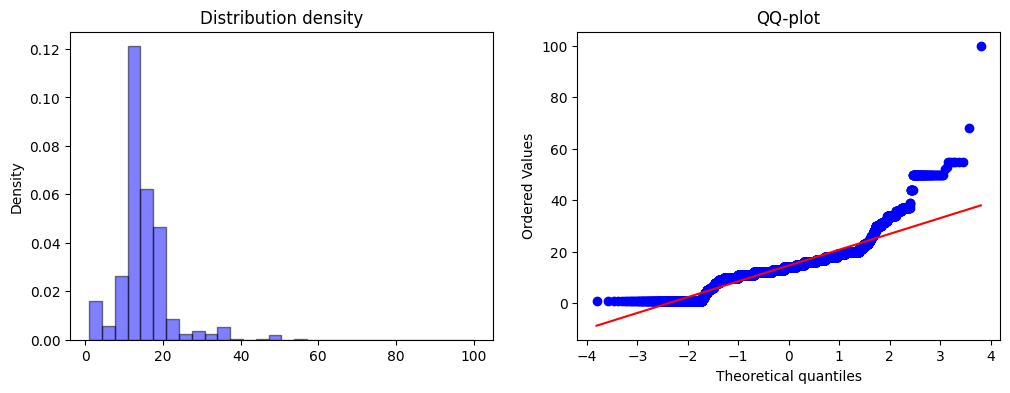

In [ ]:
plt.figure(figsize=(12, 4))

#distribution density
plt.subplot(1, 2, 1)
plt.hist(collectionPrice_df['trackCount'], density=True, bins=30, alpha=0.5, color='blue', edgecolor='black')
plt.ylabel('Density')
plt.title('Distribution density')

#QQ-plot
plt.subplot(1, 2, 2)
stats.probplot(collectionPrice_df['trackCount'], dist="norm", plot=plt)
plt.title('QQ-plot')
plt.show()

<font size="4">Distribution is not Gaussian therefore we're using Spearman correlation coefficient: </font>

In [ ]:
#Finding correlation and p-value
correlation, p_value = stats.spearmanr(collectionPrice_df['trackCount'], price_df['collectionPrice'])
print("Spearman's correlation coefficient:", correlation)
print('p-value:', p_value)

Spearman's correlation coefficient: 0.6121263253107593
p-value: 0.0


* <font size="4">p-value is 0, correlation coefficient is close to 1 therefore there's positive monotonous relation. </font>

<font size="4">Next we're checking dependence of albums' price based on tracks' price:</font>

In [ ]:
#Finding correlation and p-value
#correlation, p_value = stats.spearmanr(collectionPrice_df['trackPrice'], price_df['collectionPrice'])
correlation, p_value = stats.spearmanr(collectionPrice_df['trackPrice'], price_df['collectionPrice'])
print("Spearman's correlation coefficient:", correlation)
print('p-value:', p_value)

Spearman's correlation coefficient: 0.10018274655091011
p-value: 1.8490810568316994e-23


<font size="4">Checking is there any correlation between album price and tracks price in it:</font>

In [ ]:
#Checking for a NaN values
is_nan =df['trackPrice'].isnull().any()
print('NaN values in "trackPrice" column:', is_nan)

NaN values in "trackPrice" column: True


In [ ]:
#Finding the cheapest track
print('Min price = $', min(df['trackPrice']))
min_price_row = df[df['trackPrice'] == df['trackPrice'].min()]
min_price_row['trackCount'].values[0]

print('Number of tracks =', min_price_row['trackCount'].values[0])
print('Album name =', min_price_row['collectionName'].values[0])
print('Artist =', min_price_row['artistName'].values[0])
print('Album price = $', min_price_row['collectionPrice'].values[0])

Min price = $ -1.0
Number of tracks = 12
Album name = The Departed (Music from the Motion Picture)
Artist = Dropkick Murphys
Album price = $ 10.99


In [ ]:
#As above, creating Data Frame with positive prices:
trackPrice_df =  df.query('trackPrice > 0 & collectionPrice > 0')

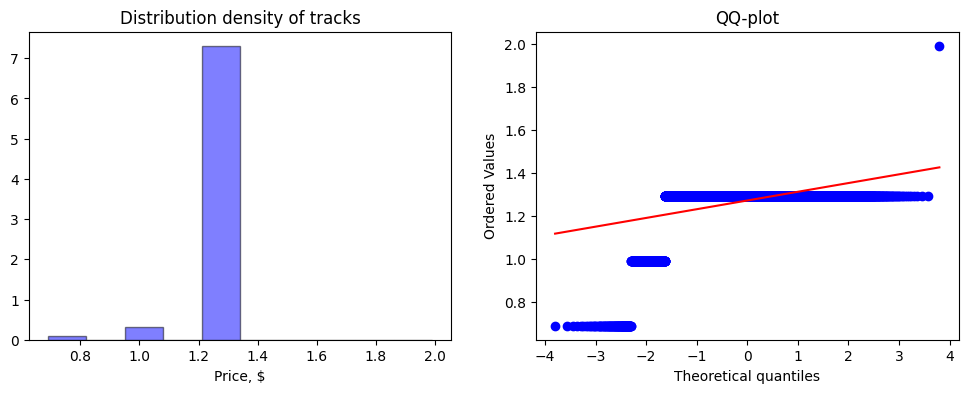

In [ ]:
#distribution density of tracks
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(trackPrice_df['trackPrice'], density=True, alpha=0.5, color='blue', edgecolor='black')
plt.xlabel('Price, $')
plt.title('Distribution density of tracks')

#QQ-plot
plt.subplot(1, 2, 2)
stats.probplot(trackPrice_df['trackPrice'], dist="norm", plot=plt)
plt.title('QQ-plot')
plt.show()

In [ ]:
#Counting only unique 'collectionId' and 'trackId'
unique_collectionPrice = trackPrice_df[['collectionId', 'collectionPrice', 'trackPrice', 'trackId']].drop_duplicates()

#Counting correlaction coefficient betweeb track and its album price using Spearman correlation coefficient
correlation, p_value = stats.spearmanr(unique_collectionPrice['trackPrice'], unique_collectionPrice['collectionPrice'])
print('Spearman correlation coefficient:', correlation)
print('p-value:', p_value)

Spearman correlation coefficient: 0.2358343334771201
p-value: 8.113088925739209e-106


* <font size ="4">p-value < 0.05 therefore we're rejecting H$_0$</font>

<font size ="4">Now checking is there any correlation between median track price value and album value. We're also counting that one album matches the only track price from its album (one-to-one vs one-to-many in case of above):</font>


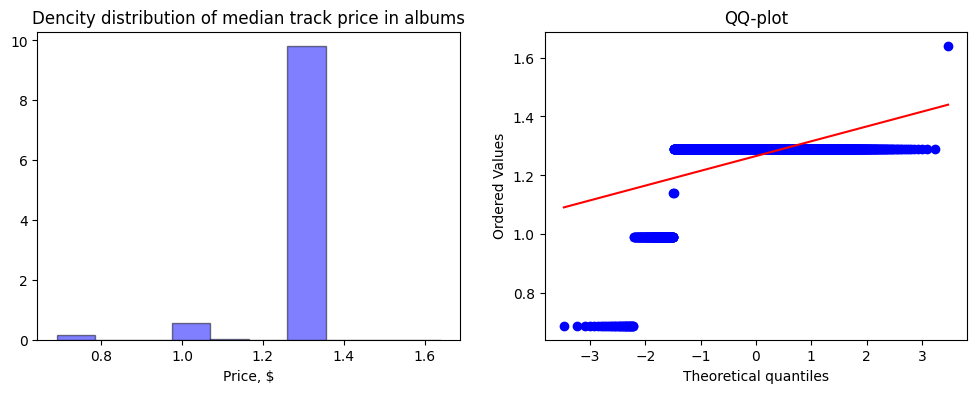

In [ ]:
#Counting median track price for each album
median_trackPrice = trackPrice_df.groupby('collectionId')['trackPrice'].median()

#Dencity distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(median_trackPrice,  density=True, alpha=0.5, color='blue', edgecolor='black')
plt.xlabel('Price, $')
plt.title('Dencity distribution of median track price in albums')

#QQ-plot
plt.subplot(1, 2, 2)
stats.probplot(median_trackPrice, dist="norm", plot=plt)
plt.title('QQ-plot')
plt.show()

<font size="4">Let us note how in the graph above the maximum value of the distribution density has changed (increased) and the range of the QQ-plot (decreased).</font>

In [ ]:
#Counting onlu unique albums through 'collectionId'
unique_collectionPrice = trackPrice_df[['collectionId', 'collectionPrice']].drop_duplicates()
#Counting median track price and correspondint albums. Again using Spearman correlation coefficient
correlation_med, p_value = stats.spearmanr(median_trackPrice, unique_collectionPrice['collectionPrice'])
print('Spearman correlation coefficient:', correlation_med)
print('p-value:', p_value)

Spearman correlation coefficient: -0.011434935277326865
p-value: 0.5541894315261149


* <font size="4">We obtained that Spearman correlation coefficient is tend from the left to 0, p-value > 0.05. We **can not** reject H$_0$ which says that there's no correlation between album and track prices.</font>

<font size="4">**Conclusion**: the track-album ratio principle (o-t-o or o-t-m) significantly affects on the final test result.</font>

<font size ="5">Dependence of albums' cost of their year of release</font>

<font size="4">Since hundreds of albums were released per year, the search of correlation will start with next graphs: average cost, median cost, variance per decades, maximum and minimum cost.</font>

Text(0.5, 1.0, 'Median album price per decade')

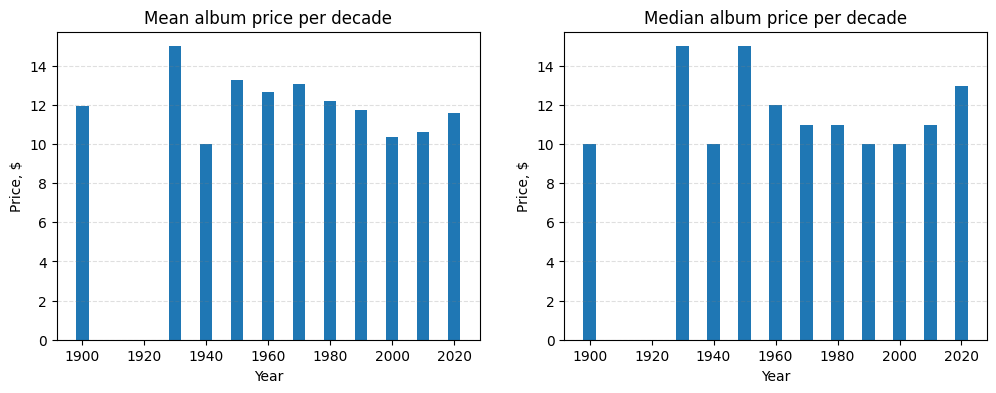

In [ ]:
#Mean album price per decade
mean_albumPriceYear = date_df.groupby('decade')['collectionPrice'].mean()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.bar(mean_albumPriceYear.index, mean_albumPriceYear.values, width=4)
plt.grid(axis='y', visible=True, linestyle='--', which='major', color='grey', alpha=.25)
plt.ylabel('Price, $')
plt.xlabel('Year')
plt.title('Mean album price per decade')

#median album price per decade
median_albumPriceYear = date_df.groupby('decade')['collectionPrice'].median()

plt.subplot(1, 2, 2)
plt.bar(median_albumPriceYear.index, median_albumPriceYear.values, width=4)
plt.grid(axis='y', visible=True, linestyle='--', which='major', color='grey', alpha=.25)
plt.ylabel('Price, $')
plt.xlabel('Year')
plt.title('Median album price per decade')

<font size="4">Searching for any correlation between median and mean values:</font>

In [ ]:
correlation = mean_albumPriceYear.corr(median_albumPriceYear)
print('Correlation coefficient:', correlation)

Correlation coefficient: 0.7403682858340421


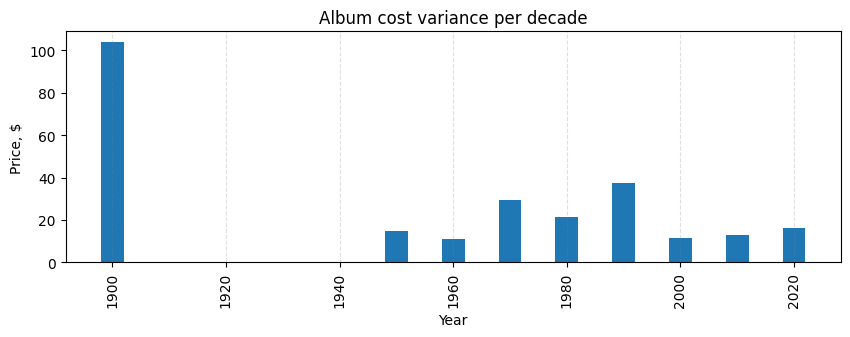

In [ ]:
#Counting variance
varPrice = date_df.groupby('decade')['collectionPrice'].var()

fig, ax8 = plt.subplots(figsize=(10, 3))
ax8.bar(varPrice.index, varPrice.values, width=4)
plt.xticks(rotation=90)
ax8.xaxis.grid(True, linestyle='--', which='major',  color='grey', alpha=.25)
plt.ylabel('Price, $')
plt.xlabel('Year')
plt.title('Album cost variance per decade')
plt.show()

# <font size="5">Analysis of track explicitness</font>

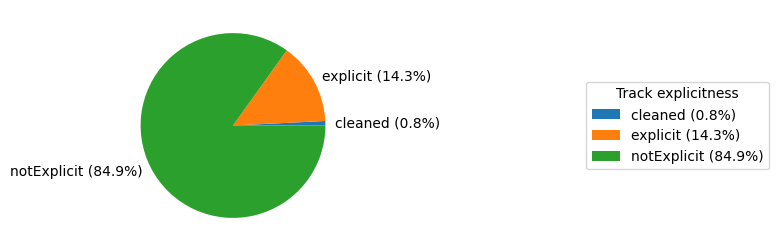

In [ ]:
#Creating pie-diagram of track explicitness
fig, ax9 = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
trackExplicitness_count = df.groupby('trackExplicitness')['trackExplicitness'].count()
percentages = [f'{val / sum(trackExplicitness_count) * 100:.1f}%' for val in trackExplicitness_count]
labels = [f'{label} ({percentage})' for label, percentage in zip(trackExplicitness_count.index, percentages)]
ax9.pie(trackExplicitness_count, labels=labels)
ax9.legend(title="Track explicitness", loc="center left", bbox_to_anchor=(2, 0, 1, 1))
plt.show()

* It's not clear that "cleaned" means but there're still almost 85% tracks that could be listened by minors.